In [1]:
### 표준 라이브러리 로딩

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터셋 정보
https://grouplens.org/datasets/movielens
#### rating 별점(평가점수)
- user_id
- movie_id
- rating
- time
#### movie
- movie_id
- title
- genre
#### user
- user_id
- gender
- age
- occuption(개인정보-직업)
- zipcode(개인정보-주소)
#### ETC
- 각 데이터는 '::' 구분자를 사용하여 열을 구분하였다.

#### 데이터 로딩

In [3]:
rating_data = pd.io.parsers.read_csv('D:/python3/data/ratings.dat', #sep='::',  # parsers -> parsing 변환
                                    names=['user_id', 'movie_id', 'rating', 'time'],
                                    delimiter='::')  # delimiter 종결자

movie_data = pd.io.parsers.read_csv('D:/python3/data/movies.dat',
                                    names=['movie_id', 'title', 'genre'],
                                    delimiter='::')

user_data = pd.io.parsers.read_csv('D:/python3/data/users.dat',
                                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'],
                                    delimiter='::')

In [4]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
rating_data.isnull().sum()  # 결측값 개수 확인

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [11]:
user_data.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

In [12]:
movie_data.isnull().sum()

movie_id    0
title       0
genre       0
dtype: int64

### 탐색적 데이터 분석

In [13]:
# 총 영화의 개수
len(movie_data['movie_id'].unique())

3883

In [14]:
# 연도별 영화의 개수를 이용해서 가장 많은 영화가 출시된 연도 Top 10
# movie_data['title'].head()
# len(movie_data['title'][-5:-1])
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])

# 개별요소의 건수 value_counts()
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [15]:
# 연대별 영화의 개수 추출
# 1900, 1910, 1920 .....
# 파생변수 : year_term
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+'0')
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

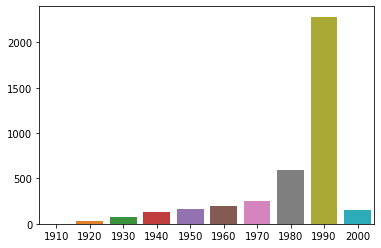

In [16]:
sns.barplot(movie_year_term.index, movie_year_term.values)
plt.show()

In [17]:
# 영화데이터에서 가장 많이 등장하는 장르는 무엇일까?
# 코미디 | 드라마 | 액션 => 구분자
# dict => key:value
unique_genre_dict = {}

for index, row in movie_data.iterrows() :      # iterrows : 행 하나하나 접근
    # genre 피처의 구분자를 분리
    genre_combination = row['genre']
    p = genre_combination.split("|")
    
    for genre in p:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1

unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

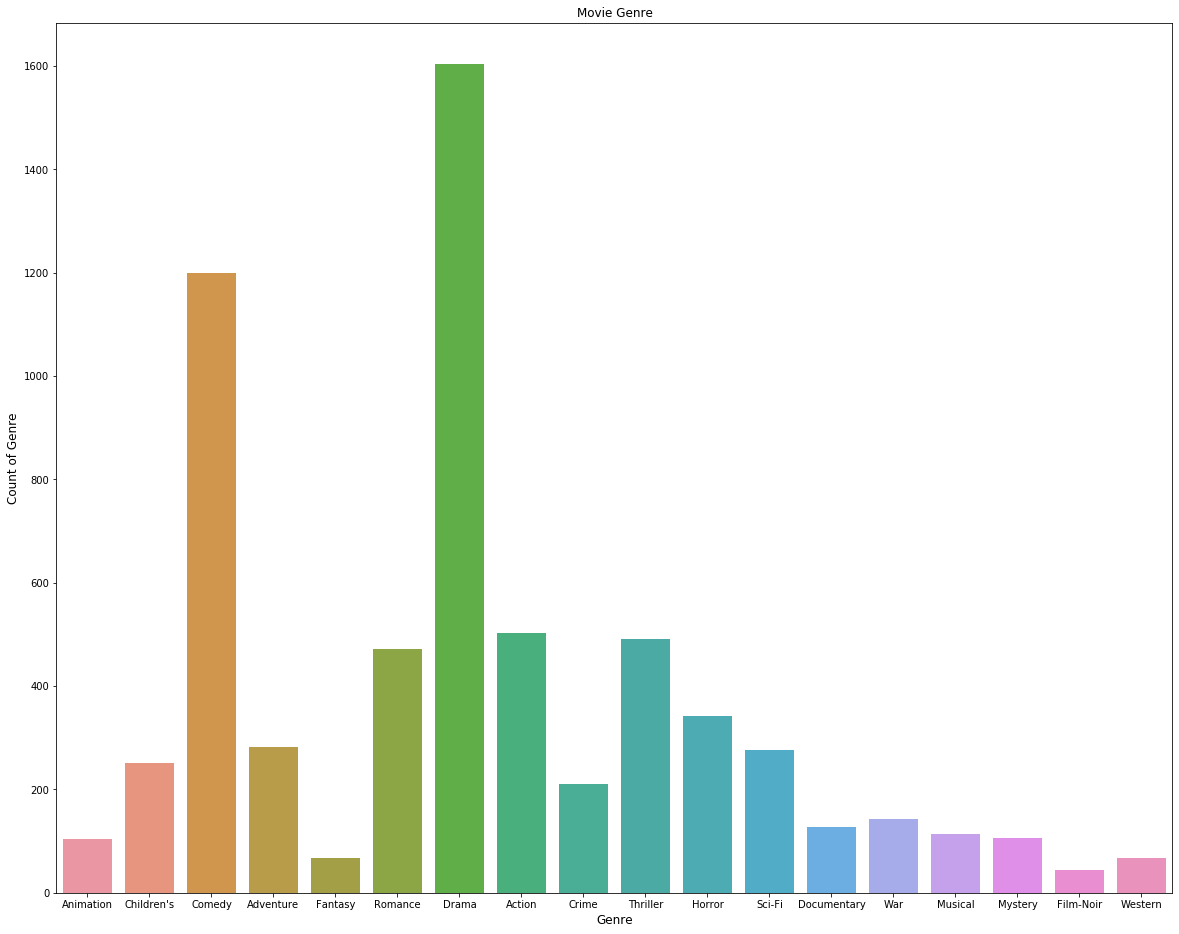

In [18]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()),
            list(unique_genre_dict.values()))
plt.title('Movie Genre')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Genre', fontsize=12)
plt.show()

In [19]:
# 사용자의 성별과 사용자의 연령대
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

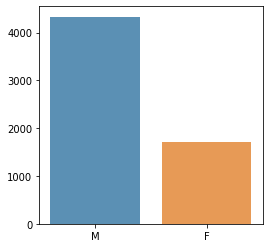

In [20]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(user_gender.index, user_gender.values, alpha=.8)
plt.show()

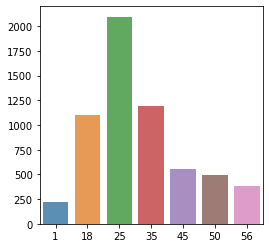

In [21]:
plt.rcParams['figure.figsize'] = [4, 4]
user_ages = user_data['age'].value_counts()
sns.barplot(user_ages.index, user_ages.values, alpha=.8)
plt.show()

In [22]:
# user의 나이를 연령대로 묶는 작업
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0]+'0'
    
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))

user_ages = user_data['ages'].value_counts()#.sort_index()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

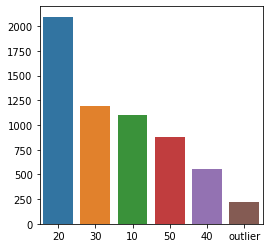

In [23]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(user_ages.index, user_ages.values)
plt.show()

In [24]:
user_data.tail()

,user_id,gender,age,occupation,zipcode,ages
6035,6036,F,25,15,32603,20
6036,6037,F,45,1,76006,40
6037,6038,F,56,1,14706,50
6038,6039,F,45,0,01060,40
6039,6040,M,25,6,11106,20


In [25]:
# 사용자의 수
len(user_data['user_id'].unique())

6040

In [26]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [27]:
rating_data.tail()

,user_id,movie_id,rating,time
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [28]:
# 각 영화의 평점횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().sort_index()
movie_rate_count.head(20)

movie_id
1     2077
2      701
3      478
4      170
5      296
6      940
7      458
8       68
9      102
10     888
11    1033
12     160
13      99
14     153
15     146
16     682
17     835
18     157
19     389
20     160
Name: rating, dtype: int64

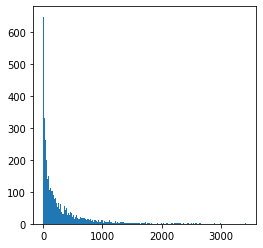

In [29]:
fig = plt.hist(movie_rate_count.values, bins=200)
plt.show()

In [30]:
print('총 영화 수 : ',len(movie_data['movie_id'].unique()))

총 영화 수 :  3883


In [31]:
print('100개 미만의 평가를 받은 영화 수 :', len(movie_rate_count[movie_rate_count<100]))

100개 미만의 평가를 받은 영화 수 : 1687


In [32]:
# 각 영화의 평균평점을 추출
# 각 영화당 평점건수와 평균값을 추출하시오
movie_groupby_rating_info = rating_data.groupby('movie_id')['rating'].agg(
    {'rated_count':'count', 'rated_mean':'mean'})
movie_groupby_rating_info.tail()

,rated_count,rated_mean
movie_id,,
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667
3951,40,3.900000
3952,388,3.780928


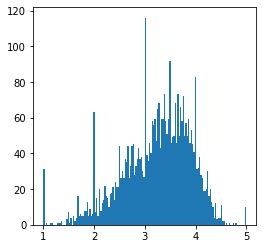

In [33]:
movie_groupby_rating_info['rated_mean'].hist(bins=150, grid=False)

In [34]:
# 유저별로 평가한 영화 개수 -> rating_count
# 유저별로 평가한 평균 영화의 평점  -> rating_mean
# 유저별로 평가한 영화 점수의 편차(std) -> rating_std

In [35]:
user_grouped_rating_info = rating_data.groupby(
    'user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns = ['rating_count', 'rating_mean', 'rating_std']
user_grouped_rating_info.head()

,rating_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


In [36]:
# 100번 이상 평가 받은 영화 중 평균평점이 높은 Top 10의 영화 출력
merged_data = movie_groupby_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data.head()

,movie_id,rated_count,rated_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990


In [37]:
# nlargest(n, 값이 있는 피처) : 가장 큰 값을 n번째까지 구해주는 함수
merged_data[merged_data['rated_count']>100][
    ['rated_mean', 'title']].nlargest(10, 'rated_mean') # nlargest : 큰 순서대로 n개

,rated_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### 영화 평점 예측 - 추천시스템 알고리즘
- 이미지, 영상 인식
- 소리 인식
- 사기방지
- 이상감지
- 침입탐지
- 환자진단
- 재고 최적화
- 수요 예측
- 추천시스템 : CF(Collaborative Filtering 상품기반(협업필터링) - 소모성물건 추천),
               CB(Content-Based Filtering 내용기반),
               KB(Knowledge-Based Filtering 지식기반)

In [38]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [39]:
rating_table = rating_data[
    ['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()
rating_table.tail(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
6031        NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  ...  NaN  NaN   
6032        4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6033        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6034        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6035        4.0  NaN  1.0  2.0  1.0  NaN  3.0  NaN  NaN  NaN  ...  NaN  NaN   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
6031      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6032      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6033      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6034      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6035      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

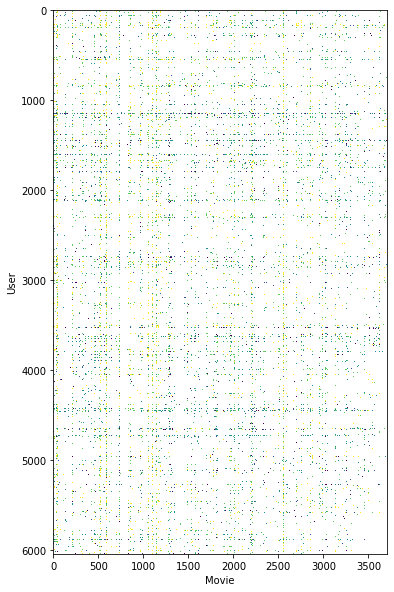

In [40]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)  # imshow 이미지 그대로,,

plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.show()             # 비워져있는거 채우기 -> SVD

### SVD를 활용한 추천시스템

In [41]:
# SVD - 행렬의 곱을 이용하여 값을 채움
from surprise import SVD, Dataset, Reader, accuracy #(정확도,정교화)
from surprise.model_selection import train_test_split  # 트레인과 테스트로 쪼갬

# https://runebook.dev/ko/docs/numpy/reference/generated/numpy.se....
np.set_printoptions(suppress=True) # 부동소수점으로 인쇄 -> 정밀도 높임

reader = Reader(rating_scale=(1,5))

In [42]:
# 데이터프레임 생성
ratings_dict = {'item_id':[1,2,3,1,2,3,2],
              'user_id':['a','a','a','b','b','b','c'],
              'rating':[2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [43]:
# 데이터 프레임을 행렬로 변환하여 확인
df_matrix_table = df[['user_id', 'item_id', 'rating']].set_index(
    ['user_id', 'item_id']).unstack()
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          NaN  5.0  NaN

In [44]:
# SVD 사용을 위한 데이터셋을 생성
data = Dataset.load_from_df(df=df[['user_id', 'item_id', 'rating']], # Dataset - SVD를 만드는 클래스
                           reader=reader)     
train_data = data.build_full_trainset()

In [45]:
model = SVD(n_factors = 8,   # 요소의 수
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 10)

model.fit(train_data)

In [46]:
# build_anti_testset()   => 일부분 채움    // cf. build_full_trainset => 전체 채움
# 학습에 사용된 matrix에 0으로 평가되어있는(비어있는) 부분의 데이터를
# 또다른 user 혹은 item으로 학습을 시켜 채움
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

for _, lid, _, predicted_rating, _ in predictions:
    print('Item id : ', lid, ', predicted rating : ', predicted_rating)

Item id :  1 , predicted rating :  3.5828843398962844
Item id :  3 , predicted rating :  3.8150455578515357


In [47]:
# 학습데이터
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

In [48]:
# SVD 모델 학습
import time

train_start = time.time()

model = SVD(n_factors = 8,   # 요소의 수
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)

model.fit(train_data)

train_end = time.time()
print(train_end-train_start)  # 학습시간

80.42942714691162


In [49]:
# 영화의 평점을 예측할 타겟이 되는 유저
target_user_id = 4             # 4번유저
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [50]:
# 딕셔너리 형태로 보기 -> 영화번호: 평점
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():    # iterrow() 행단위로 읽어오기
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [51]:
# 4번 유저가 보지 않은 영화들 중 (예상)평점이 높은 영화 10개 추출

# 4번 유저가 보지 않은 영화의 정보를 테스트 데이터로 생성
test_data = []

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))
    
len(test_data)

3862

In [52]:
# 타겟 유저(4번)의 평점 점수를 예측
target_user_predictions = model.test(test_data)

In [53]:
# 예측된 점수 중에서 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    
    for uid, mid, rating, predicted_rating, _ in predictions:  # uid 유저, mid 영화
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
        
target_user_movie_predict_dict = get_user_predicted_ratings(
    predictions=target_user_predictions, 
    user_id=target_user_id, 
    user_history=target_user_movie_rating_dict)

In [59]:
# target_user_movie_predict_dict 예측된 점수를 이용해서 타겟 유저에게 ...
import operator

target_user_top10_predicted = sorted(
    target_user_movie_predict_dict.items(),
    key=operator.itemgetter(1), reverse=True)[:10]  # 1 -> 평점부분 / 평점 기준으로 높은거 추천
target_user_top10_predicted

[(53, 5),
 (214, 5),
 (602, 5),
 (615, 5),
 (669, 5),
 (750, 5),
 (858, 5),
 (904, 5),
 (908, 5),
 (910, 5)]

In [61]:
# 타이틀 정보를 포함해서 출력
movie_dict = {}

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title
    
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ' : ', predicted_rating)

Lamerica (1994)  :  5
Before the Rain (Pred dozhdot) (1994)  :  5
Great Day in Harlem, A (1994)  :  5
Bread and Chocolate (Pane e cioccolata) (1973)  :  5
Aparajito (1956)  :  5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)  :  5
Godfather, The (1972)  :  5
Rear Window (1954)  :  5
North by Northwest (1959)  :  5
Some Like It Hot (1959)  :  5


### 예측 모델의 평가
- RMSE

In [62]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=.2)

# SVD 모델 학습
train_start = time.time()

model = SVD(n_factors = 8,   # 요소의 수
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)

model.fit(train_data)

train_end = time.time()
print('training time of model : %.2f second' % (train_end-train_start))

# 예측
predictions = model.test(test_data)

# 테스트 데이터의 RMSE 출력
print('RMSE of test dataset in SVD model :')
accuracy.rmse(predictions)

training time of model : 72.91 second
RMSE of test dataset in SVD model :
RMSE: 0.8587


0.858656902492476

- RMSE 평가는 예측값과 실제값 차이의 합을 나타내는 수치이기 때문에 작을수록 좋은 모델을 뜻한다

### 하이퍼 파라미터 튜닝

In [63]:
rmse_list_by_factors = []
ttime_list_by_factors = []

for n in range(1, 15):
    
    train_start = time.time()

    model = SVD(n_factors = n,   # 요소의 수
               lr_all = 0.005,
               reg_all = 0.02,
               n_epochs = 100)

    model.fit(train_data)

    train_end = time.time()
    print('training time of model : %.2f second' % (train_end-train_start))
    print('RMSE of test datasets in SVD model.n_factors = ' + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end-train_start))
    print('-'*40)

print('searching n_factors is finish.')
# RMSE가 낮을수록 좋은 모델

training time of model : 59.30 second
RMSE of test datasets in SVD model.n_factors =1
RMSE: 0.8830
-------------------------
training time of model : 60.91 second
RMSE of test datasets in SVD model.n_factors =2
RMSE: 0.8728
-------------------------
training time of model : 63.06 second
RMSE of test datasets in SVD model.n_factors =3
RMSE: 0.8663
-------------------------
training time of model : 67.10 second
RMSE of test datasets in SVD model.n_factors =4
RMSE: 0.8634
-------------------------
training time of model : 67.12 second
RMSE of test datasets in SVD model.n_factors =5
RMSE: 0.8613
-------------------------
training time of model : 70.37 second
RMSE of test datasets in SVD model.n_factors =6
RMSE: 0.8583
-------------------------
training time of model : 71.42 second
RMSE of test datasets in SVD model.n_factors =7
RMSE: 0.8587
-------------------------
training time of model : 75.29 second
RMSE of test datasets in SVD model.n_factors =8
RMSE: 0.8590
-------------------------


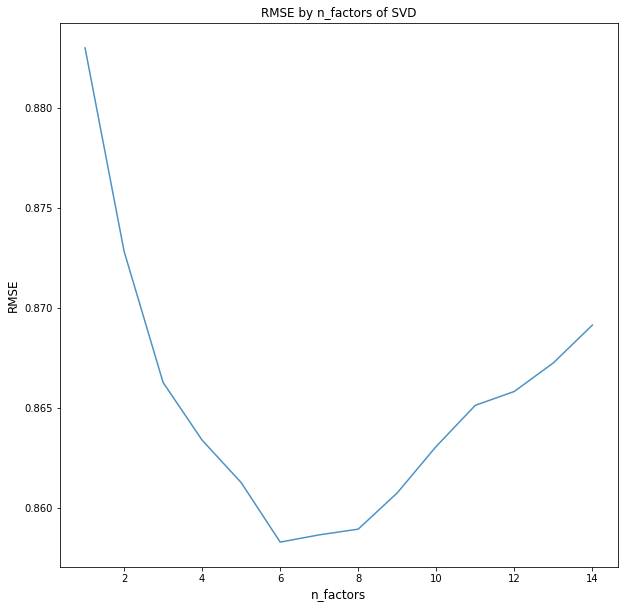

In [64]:
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

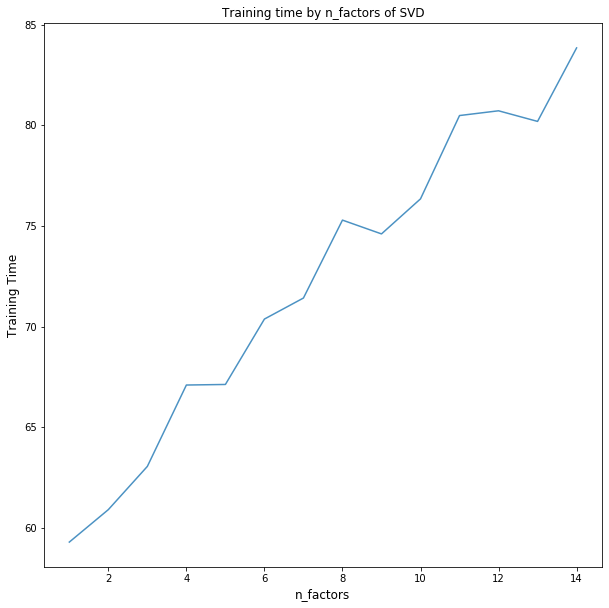

In [65]:
plt.plot(range(1, 15), ttime_list_by_factors, alpha=0.8)
plt.title('Training time by n_factors of SVD')
plt.ylabel('Training Time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

In [ ]:
# RMSE가 낮고, 실행시간이 적은
# n_factors = 6으로 선정!!

In [ ]:
[예측대상 - 사용모델]
숫자형 - 회귀모델
범주형(카테고리) - 분류분석모델